<a href="https://colab.research.google.com/github/Abmisar/ABsFilmReviews/blob/main/Labs/Day%203/IntroBioinf_Day3_Morning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 3 - Morning Lab
## Hands-on with Genomic Databases and Metagenomics

---

# 📌 **Part 1: *NCBI* - Genome Data Viewer**

### NCBI Genome Data Viewer (GDV)

➡️ The **NCBI Genome Data Viewer (GDV)** is a powerful, interactive web-based tool for visualizing and exploring annotated genome assemblies.  
It allows you to:
- Browse gene structures, variants, regulatory elements, and other genomic features
- Perform comparative multi-species alignments
- Zoom into specific regions
- Overlay custom data tracks
- Integrate sequence data with functional annotations

**Access**: https://www.ncbi.nlm.nih.gov/gdv  
**Quick intro video**: https://www.youtube.com/watch?v=iPSq0VfU19c

### 🔶 **Task 1/6:** Explore the Genome Data Viewer (GDV)

⚠️ **Note**: This task is **totally optional**. Feel free to explore the Genome Data Viewer at your own pace if you're interested.
The upcoming sections will focus on programmatic approaches using Python/Biopython, which is the main skill to master.

**Step-by-step guide (if you want to try it)**:

1. Go to: https://www.ncbi.nlm.nih.gov/gdv
2. Select **Human** as the organism and search for the gene **ADA**
3. In the top-right corner, click **Tracks** → **NCBI Recommended Track Sets** → **Clinical**
4. Explore the displayed **active/binding sites** and other functional annotations
5. Scroll down to the **exons** track, locate **exon 2**, right-click it, and select **Zoom to sequence**
6. Examine the **variants** in exon 2:
   - Hover over the rsXXXX codes to view details
   - Identify which variants are classified as **pathogenic** and which are **benign**

💡 **Tip**: Use the zoom controls and track toggles to focus on regions of interest — take your time to explore!

### 🔶 **Task 2/6:** Use Biopython to access a specific gene across different organisms and compare their sequences


In [1]:
!pip install biopython
from IPython.display import clear_output
clear_output()

### 🔶 **Task 3/6:** Fetch gene sequences by using BioPython's `Entrez` package
➡️ Using `Entrez`, fetch the sequence of gene `NM_007294.3`

In [6]:
from Bio import SeqIO
from Bio import Entrez

# Example GenBank ID for BRCA1 gene (from human genome)
gene_id = "NM_007294.3"  # BRCA1 gene mRNA it's a DNA sequence that represents the mRNA

# Set your email address for NCBI requests
Entrez.email = "your_email@example.com"

# Function to fetch gene sequence using GenBank accession
def fetch_gene_sequence(gene_id):
  handle = Entrez.efetch(db="nucleotide",id=gene_id, rettype="gb", retmode="text" )
  record = SeqIO.read(handle, "genbank")
  return record.seq
    # 🔸 Continue your code here
gene_sequence = fetch_gene_sequence(gene_id)

<details>
<summary><font color="Orange">Click here to reveal the answer</font></summary>

```python
from Bio import SeqIO
from Bio import Entrez

# Example GenBank ID for BRCA1 gene (from human genome)
gene_id = "NM_007294.3"  # BRCA1 gene mRNA

# Set your email address for NCBI requests
Entrez.email = "your_email@example.com"

# Function to fetch gene sequence using GenBank accession
def fetch_gene_sequence(gene_id):
    handle = Entrez.efetch(db="nucleotide", id=gene_id, rettype="gb", retmode="text")
    record = SeqIO.read(handle, "genbank")
    return record.seq


# Fetch the gene sequence
gene_sequence = fetch_gene_sequence(gene_id)
```
</details>

### 🔶 **Task 4/6:**  Find out the length of the Human BRCA1 gene sequence

💡 Print the first 1000 base pairs from the sequence you just fetched. Do you observe any "U" in the sequence?


In [21]:
# Display the first 1000 base pairs of the BRCA1 gene
# 🔸 Continue your code here
print(gene_sequence[:1000])

# Check if you find any U in the sequence
# 🔸 Continue your code here
count = 0
for i in gene_sequence:
  if (i == "U"):
    count+1
print(count)


GTACCTTGATTTCGTATTCTGAGAGGCTGCTGCTTAGCGGTAGCCCCTTGGTTTCCGTGGCAACGGAAAAGCGCGGGAATTACAGATAAATTAAAACTGCGACTGCGCGGCGTGAGCTCGCTGAGACTTCCTGGACGGGGGACAGGCTGTGGGGTTTCTCAGATAACTGGGCCCCTGCGCTCAGGAGGCCTTCACCCTCTGCTCTGGGTAAAGTTCATTGGAACAGAAAGAAATGGATTTATCTGCTCTTCGCGTTGAAGAAGTACAAAATGTCATTAATGCTATGCAGAAAATCTTAGAGTGTCCCATCTGTCTGGAGTTGATCAAGGAACCTGTCTCCACAAAGTGTGACCACATATTTTGCAAATTTTGCATGCTGAAACTTCTCAACCAGAAGAAAGGGCCTTCACAGTGTCCTTTATGTAAGAATGATATAACCAAAAGGAGCCTACAAGAAAGTACGAGATTTAGTCAACTTGTTGAAGAGCTATTGAAAATCATTTGTGCTTTTCAGCTTGACACAGGTTTGGAGTATGCAAACAGCTATAATTTTGCAAAAAAGGAAAATAACTCTCCTGAACATCTAAAAGATGAAGTTTCTATCATCCAAAGTATGGGCTACAGAAACCGTGCCAAAAGACTTCTACAGAGTGAACCCGAAAATCCTTCCTTGCAGGAAACCAGTCTCAGTGTCCAACTCTCTAACCTTGGAACTGTGAGAACTCTGAGGACAAAGCAGCGGATACAACCTCAAAAGACGTCTGTCTACATTGAATTGGGATCTGATTCTTCTGAAGATACCGTTAATAAGGCAACTTATTGCAGTGTGGGAGATCAAGAATTGTTACAAATCACCCCTCAAGGAACCAGGGATGAAATCAGTTTGGATTCTGCAAAAAAGGCTGCTTGTGAATTTTCTGAGACGGATGTAACAAATACTGAACATCATCAACCCAGTAATAATGATTTGAACACCACTGAGAAGCGTGCAGCTGAGAGG

<details>
<summary><font color="Orange">Click here to reveal the answer</font></summary>

```python
# Display the first 1000 base pairs of the BRCA1 gene
print(gene_sequence[:1000])  # First 1000 base pairs
print("Length of the sequence: ", len(gene_sequence))

# Check if you find any U in the sequence
if 'U' in gene_sequence:
    print("Uracil (U) found in the sequence.")
else:
    print("Cannot find any Uracil (U) in the sequence.")
```
</details>

### 🔶 **Task 5/6:** Explore sequences from various species

➡️ Use different GenBank IDs to explore sequences from various species, such as mouse, plants, or bacteria. For instance, you can fetch the sequence for the mouse BRCA1 gene using the GenBank ID `NM_009764.3` (https://www.ncbi.nlm.nih.gov/nuccore/NM_009764.3).

Do you notice any differences in gene length or nucleotide sequence compared to the human gene? Analyze variations in sequence order and structure.

In [23]:
mouse_gene_id="NM_009764.3" #Mouse BRCA1
mouse_gene_sequence = fetch_gene_sequence(mouse_gene_id)

# Display the first 1000 base pairs of the BRCA1 gene
# 🔸 Continue your code here
print(mouse_gene_sequence[:1000])

GTTCCGAAAGGCTAGCGCTAGGCGCCAAGCGGCCGGTTTCCTTGGCGACGGAGAGCGCGGGAATTTTAGATAGATTGTAATTGCGGCTGCGCGGCCGCTGCCCGTGCAGCCAGAGGATCCAGCACCTCTCTTGGGGCTTCTCCGTCCTCGGCGCTTGGAAGTACGGATCTTTTTTCTCGGAGAAAAGTTCACTGGAACTGGAAGAAATGGATTTATCTGCCGTCCAAATTCAAGAAGTACAAAATGTCCTTCATGCTATGCAGAAAATCTTAGAGTGTCCGATCTGTTTGGAACTGATCAAAGAACCTGTTTCCACAAAGTGTGACCACATATTTTGCAAATTTTGTATGCTGAAACTTCTTAACCAGAAGAAAGGGCCTTCACAATGTCCTTTGTGTAAGAATGAGATAACCAAAAGGAGCCTACAGGGAAGCACAAGGTTTAGTCAGCTTGCTGAAGAGCTGCTGAGAATAATGGCTGCTTTTGAGCTTGACACGGGAATGCAGCTTACAAATGGTTTTAGTTTTTCAAAAAAGAGAAATAATTCTTGTGAGCGTTTGAATGAGGAGGCGTCGATCATCCAGAGCGTGGGCTACCGGAACCGTGTCAGAAGGCTTCCCCAGGTCGAACCTGGAAATGCCACCTTGAAGGACAGCCTAGGTGTCCAGCTGTCTAACCTTGGAATCGTGAGATCAGTGAAGAAAAACAGGCAGACCCAACCTCGAAAGAAATCTGTCTACATTGAACTAGACTCTGATTCTTCTGAAGAGACAGTAACTAAGCCAGGTGATTGCAGTGTGAGAGACCAGGAATTGTTACAGACCGCCCCTCAAGAAGCTGGAGATGAAGGCAAGCTGCACTCTGCAGAAGAGGCTGCTTGTGAGTTTTCTGAGGGCATAAGAAACATTGAACATCATCAATGCAGTGATGATTTAAACCCTACTGAGAATCATGCAACTGAAAGGCATCCAGAAAAATGTCAGAGTATTTCTATTTCAAA

<details>
<summary><font color="Orange">Click here to reveal the answer</font></summary>

```python

mouse_gene_id="NM_009764.3" #Mouse BRCA1
mouse_gene_sequence = fetch_gene_sequence(mouse_gene_id)

# Display the first 1000 base pairs of the BRCA1 gene
print(mouse_gene_sequence[:1000])  # First 1000 base pairs
print ("lenght of the sequence: ", len(mouse_gene_sequence))

```
</details>

### 🔶 **Task 6/6:** Extract exons in different organisms and compare. Do you see any conserved exons?

📍 **What is an Exon?**

An **exon** is a segment of a gene (or pre-mRNA) that remains in the mature mRNA after **RNA splicing**.  

Exons include:
- **Coding regions** (translated into protein)
- **Untranslated regions** (5' UTR and 3' UTR)

In contrast, **introns** are the non-coding sequences removed during splicing.


<div style="display: flex; justify-content: center;"> <img src="https://www.genome.gov/sites/default/files/media/images/2022-05/Exon.jpg?width=200&referrer=grok.com" width="80%" /> </div>

**Why exons matter**:
- They determine the final protein sequence
- Mutations in exons often affect protein function
- Alternative splicing of exons allows one gene to produce multiple protein isoforms

💡 **Feature.qualifiers in GenBank Records**

When parsing GenBank files with **Biopython** (`SeqIO`), each feature (e.g., "exon", "CDS", "gene") has a **qualifiers** dictionary containing metadata.

🔻 **Official References**
- [INSDC Feature Table Definition](https://www.insdc.org/submitting-standards/feature-table/#:~:text=Feature%20Key%20%20%20%20%20%20%20%20%20%20%20exon,standard_name%3D%22text%22%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20/trans_splicing) — the standard list of allowed qualifiers used by NCBI

In [33]:
from Bio import Entrez, SeqIO

Entrez.email = "your_email@example.com"
GENE_IDS = ["NM_007294.3", "NM_009764.3"]

def print_exon_info(gene_id):
    """Fetches a single gene record and prints its exon locations."""
    handle = Entrez.efetch(db="nucleotide", id=gene_id, rettype="gb", retmode="text")
    record = SeqIO.read(handle, "genbank")
    handle.close()

    print(f"\nGene: {record.description}")

    for feature in record.features:
            # 🔸 Continue your code here
      if feature.type == "exon":
        number = feature.qualifiers.get("number",["N/A"])[0]
        print(f"Exon: {number} | Location: {feature.location}")

if __name__ == "__main__":
    for gid in GENE_IDS:
        print_exon_info(gid)


Gene: Homo sapiens BRCA1 DNA repair associated (BRCA1), transcript variant 1, mRNA
Exon: N/A | Location: [0:213](+)
Exon: N/A | Location: [213:312](+)
Exon: N/A | Location: [312:366](+)
Exon: N/A | Location: [366:444](+)
Exon: N/A | Location: [444:533](+)
Exon: N/A | Location: [533:673](+)
Exon: N/A | Location: [673:779](+)
Exon: N/A | Location: [779:825](+)
Exon: N/A | Location: [825:902](+)
Exon: N/A | Location: [902:4328](+)
Exon: N/A | Location: [4328:4417](+)
Exon: N/A | Location: [4417:4589](+)
Exon: N/A | Location: [4589:4716](+)
Exon: N/A | Location: [4716:4907](+)
Exon: N/A | Location: [4907:5218](+)
Exon: N/A | Location: [5218:5306](+)
Exon: N/A | Location: [5306:5384](+)
Exon: N/A | Location: [5384:5425](+)
Exon: N/A | Location: [5425:5509](+)
Exon: N/A | Location: [5509:5564](+)
Exon: N/A | Location: [5564:5638](+)
Exon: N/A | Location: [5638:5699](+)
Exon: N/A | Location: [5699:7207](+)

Gene: Mus musculus breast cancer 1, early onset (Brca1), mRNA
Exon: N/A | Location: [

<details>
<summary><font color="Orange">Click here to reveal the answer</font></summary>

```python
from Bio import Entrez, SeqIO

Entrez.email = "your_email@example.com"
GENE_IDS = ["NM_007294.3", "NM_009764.3"]

def print_exon_info(gene_id):
    """Fetches a single gene record and prints its exon locations."""
    handle = Entrez.efetch(db="nucleotide", id=gene_id, rettype="gb", retmode="text")
    record = SeqIO.read(handle, "genbank")
    handle.close()

    print(f"\nGene: {record.description}")
    
    for feature in record.features:
        if feature.type == "exon":
            # Get the exon number, defaulting to 'N/A' if missing
            number = feature.qualifiers.get("number", ["N/A"])[0]
            print(f"Exon {number} | Location: {feature.location}")

if __name__ == "__main__":
    for gid in GENE_IDS:
        print_exon_info(gid)

```
</details>


# **📌 Part 2: Metagenomics Data Analysis by using MGnify and Python**

### MGnify – Metagenomics Resource from EMBL-EBI

⚠️ **Note**: This task is **totally optional**.

➡️ **MGnify** (previously EBI Metagenomics) is a powerful platform for analyzing and exploring **metagenomic** data from diverse environments (human microbiome, soil, oceans, food systems, etc.).

**Key Features**:
- Support for multiple sequencing technologies
- Rich visualizations (bar plots, heatmaps, etc.)
- Access to thousands of public datasets + option to submit your own

🔎 **Hands-on Exploration (Optional – Web Interface)**

Follow these steps to browse real metagenomic data:

1. Visit: https://www.ebi.ac.uk/metagenomics
2. Go to **Browse** → **Studies**
3. Apply filter: **Biome** = "Food production"  
   → Select study **MGYS00006244**  
     (Short-read sequencing of distinct cheese rinds)  
     Direct link: [https://www.ebi.ac.uk/metagenomics/studies/MGYS00006244](https://www.ebi.ac.uk/metagenomics/studies/MGYS00006244#analysis)
4. Explore the **Overview** tab: Read the study description, sample details, and metadata
5. Switch to **Analysis Summary**:  
   Here you’ll find downloadable analysis results (taxonomic profiles, functional annotations, etc.)

🎯 **Next step**: In the upcoming sections, we’ll learn how to programmatically access MGnify data and perform analysis using Python!


### 🔶 **Task 1/:** Taxa Abdundance Visualization

The following scripts processes a toxonomic abdundance table (TSV format) and generates a stacked bar chart to visualize the distribution of different microbial phyla across multiple samples.

📍 **What is Taxa Abundance?**

**Taxa abundance** simply means **how many** (or how common) members of a particular group (like a phylum) are found in a sample.

In microbiome research (e.g., using DNA sequencing with the SSU v5.0 pipeline), we ask:  
**“Which microbes are living here, and how many of each kind are there?”**

- **High abundance** → This group is very common / dominant  
  → It probably has a big impact on how the ecosystem works (e.g., helps digest food, produces important compounds).

- **Low abundance** → These are the “rare” microbes  
  → They might be specialists, visitors, or only active under certain conditions (part of the “rare biosphere”).

💡 **Hint**:
- Use pandas to process the data: https://www.w3schools.com/python/pandas/default.asp
- Use matplotlib to skectch a bar chart: https://matplotlib.org/stable/users/explain/quick_start.html

In [34]:
!wget  https://www.ebi.ac.uk/metagenomics/api/v1/studies/MGYS00006244/pipelines/5.0/file/ERP142430_phylum_taxonomy_abundances_SSU_v5.0.tsv
from IPython.display import clear_output
clear_output()

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a pandas DataFrame
file_path = 'ERP142430_phylum_taxonomy_abundances_SSU_v5.0.tsv'  # your file name here
df = pd.read_csv(file_path, sep='\t')
print(df.shape)
print(df.columns)
print(df.head())
# Sum abundances for each phylum across samples
# 🔸 Continue your code here

# Plot a stacked bar chart
# 🔸 Continue your code here


(16, 14)
Index(['superkingdom', 'kingdom', 'phylum', 'ERZ18545326_FASTA',
       'ERZ18545346_FASTA', 'ERZ18545342_FASTA', 'ERZ18545327_FASTA',
       'ERZ18545344_FASTA', 'ERZ18545341_FASTA', 'ERZ18545345_FASTA',
       'ERZ18545330_FASTA', 'ERZ18545343_FASTA', 'ERZ18545329_FASTA',
       'ERZ18545328_FASTA'],
      dtype='object')
  superkingdom     kingdom          phylum  ERZ18545326_FASTA  \
0     Bacteria  Unassigned  Actinobacteria                  0   
1     Bacteria  Unassigned   Bacteroidetes                  1   
2     Bacteria  Unassigned    Balneolaeota                  0   
3     Bacteria  Unassigned      Firmicutes                  5   
4     Bacteria  Unassigned    Fusobacteria                  0   

   ERZ18545346_FASTA  ERZ18545342_FASTA  ERZ18545327_FASTA  ERZ18545344_FASTA  \
0                  9                  5                  6                  4   
1                  0                  4                  0                  1   
2                  0           

<details>
<summary><font color="Orange">Click here to reveal the answer</font></summary>


```python

import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a pandas DataFrame
file_path = 'ERP142430_phylum_taxonomy_abundances_SSU_v5.0.tsv'  # your file name here
df = pd.read_csv(file_path, sep='\t')

# Sum abundances for each phylum across samples
abundance_data = df.groupby('phylum').sum(numeric_only=True)

# Plot a stacked bar chart
abundance_data.T.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Taxa Abundance Distribution Across Samples')
plt.ylabel('Abundance')
plt.xlabel('Samples')
plt.legend(title='Phylum', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

```
</details>


**👀 Observation**

**Look closely at the stacked bar chart above!**  

The **Unassigned** category appears as the **most dominant phylum** (the tallest/yellowest stack in the chart).  

⚠️ This is very common in real metagenomics data and does not mean something is wrong. It simply shows that many sequences could not be confidently assigned to any known taxonomic group, we'll see why this happens shortly.

---

### 🔶 **Task 2/2**: Identify and Plot Top 5 Most Abundant Phyla

➡️ In metagenomics analysis (e.g., from MGnify), many reads are assigned to taxonomic groups (phyla, genera, etc.), but some remain **"Unassigned"**.

**Example code snippet** (typical filtering step):

```python
# Keep only rows with valid taxonomic assignment
df_filtered = df[df['Taxon'] != 'Unassigned']
```

📍 **Why Do We Discard "Unassigned" Taxonomic Assignments?**

In metagenomics analysis (e.g., MGnify results), some sequences are labeled as **"Unassigned"**. We usually remove them from downstream analysis. Here's why:

- **"Unassigned"** means the tool could not confidently assign the sequence to any known taxon  
  → Reasons include:  
    - Short/poor-quality reads  
    - Novel microbes  
    - Gaps in the reference database  

These entries give **no useful biological information** about which organisms are actually present.

⚠️ Keeping them would **dilute** you from real patterns in the community.


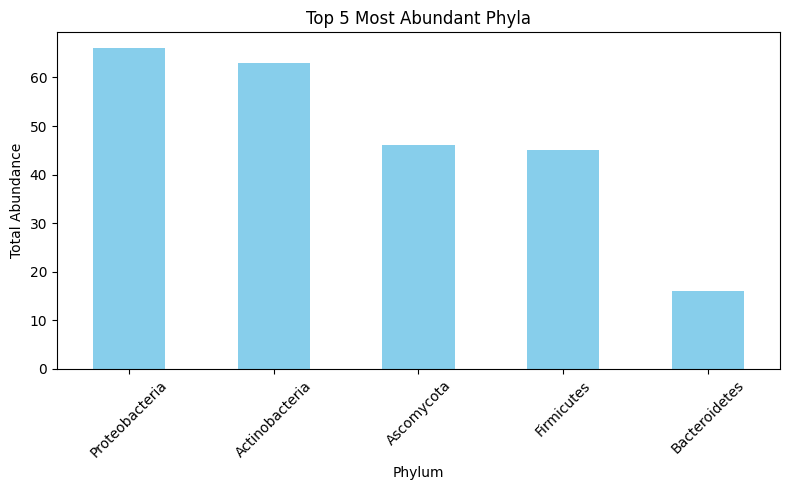

In [ ]:
file_path = 'ERP142430_phylum_taxonomy_abundances_SSU_v5.0.tsv'  # your file name here
df = pd.read_csv(file_path, sep='\t')

# Keep only rows with valid taxonomic assignment
df = df[df['phylum'] != 'Unassigned']

# Sum abundances across all samples for each phylum
# 🔸 Continue your code here

# Sort and select the top 5 most abundant phyla
# 🔸 Continue your code here

# Plot the top 5 phyla as a bar chart
# 🔸 Continue your code here


<details>
<summary><font color="Orange">Click here to reveal the answer</font></summary>


```python

file_path = 'ERP142430_phylum_taxonomy_abundances_SSU_v5.0.tsv'  # your file name here
df = pd.read_csv(file_path, sep='\t')

# Keep only rows with valid taxonomic assignment
df = df[df['phylum'] != 'Unassigned']

# Sum abundances across all samples for each phylum
total_abundance = df.groupby('phylum').sum(numeric_only=True).sum(axis=1)

# Sort and select the top 5 most abundant phyla
top5_phyla = total_abundance.sort_values(ascending=False).head(5)

# Plot the top 5 phyla as a bar chart
plt.figure(figsize=(8, 5))
top5_phyla.plot(kind='bar', color='skyblue')
plt.title('Top 5 Most Abundant Phyla')
plt.ylabel('Total Abundance')
plt.xlabel('Phylum')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
```
</details>

**👀 Observation**

The top identified taxa reflect a **healthy and diverse cheese microbiome** with key roles in fermentation, flavor development, and ripening:

- **Proteobacteria** — Often part of surface or environmental communities, influencing overall microbial balance and subtle flavor notes  
- **Actinobacteria** — Contribute to aroma and texture during ripening  
- **Ascomycota** — Play a major role in fungal ripening and flavor development  
- **Firmicutes** — Drive fermentation and acid production  
- **Bacteroidetes** — Help break down complex carbohydrates and support microbial balance  

This composition indicates a well-balanced cheese ecosystem, likely resulting in desirable sensory qualities such as rich flavor, pleasant aroma, and appealing texture.


#### Contributed by: Ahmed Bahaj

- [LinkedIn Profile](https://www.linkedin.com/in/ahmed-bahaj-6330031b8/)